<a href="https://colab.research.google.com/github/darshvaghasia12/PneumoniaDetection/blob/main/Transfer_Learning_VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive

/content/drive


In [ ]:
ls

MyDrive/


In [ ]:
cd My\ Drive

/content/drive/My Drive


In [ ]:
cd Pneumonia

/content/drive/My Drive/Pneumonia


In [ ]:
# import the libraries as shown below
#from keras.applications.vgg19 import VGG19
#from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 3238s 20s/step - loss: 0.3468 - accuracy: 0.8682 - val_loss: 0.2956 - val_accuracy: 0.8942
Epoch 2/5
163/163 [==============================] - 2144s 13s/step - loss: 0.1360 - accuracy: 0.9473 - val_loss: 0.2983 - val_accuracy: 0.8990
Epoch 3/5
163/163 [==============================] - 2133s 13s/step - loss: 0.1221 - accuracy: 0.9519 - val_loss: 0.2681 - val_accuracy: 0.9135
Epoch 4/5
163/163 [==============================] - 2137s 13s/step - loss: 0.1097 - accuracy: 0.9540 - val_loss: 0.4259 - val_accuracy: 0.8269
Epoch 5/5
163/163 [==============================] - 2134s 13s/step - loss: 0.1268 - accuracy: 0.9569 - val_loss: 0.2903 - val_accuracy: 0.9119


In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_set, len(test_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Pneumonia','Normal']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[211  23]
 [ 32 358]]
Classification Report
              precision    recall  f1-score   support

   Pneumonia       0.87      0.90      0.88       234
      Normal       0.94      0.92      0.93       390

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.91       624
weighted avg       0.91      0.91      0.91       624



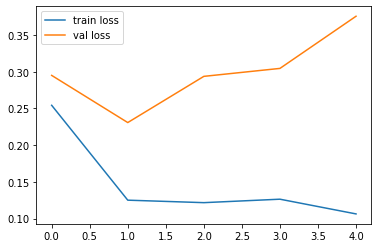

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
# # plot the loss
# plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss@')

# # plot the accuracy
# plt.plot(r.history['acc'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

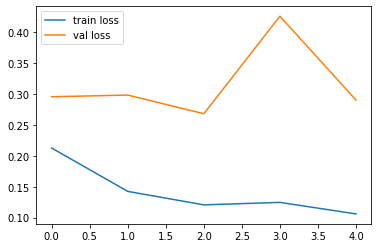

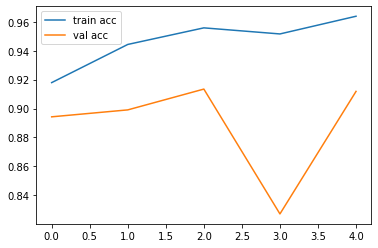

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_16')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_16')